In [2]:
import pandas as pd
import numpy as np

happiness = pd.read_csv('happiness.csv')
happiness.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
happiness.shape

(156, 8)

Remove the feature containing the country names.

In [4]:
no_country = pd.DataFrame(happiness)
no_country.drop(columns='Country or region', inplace=True)
no_country

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


1. Perform some univariate EDA on the features within the dataset.

In [5]:
corr = no_country.corr(method= 'pearson')
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


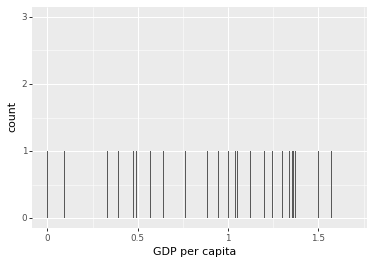

<ggplot: (371692523)>

In [6]:
from plotnine import *

ggplot(data = no_country) + geom_bar(mapping= aes(x='GDP per capita'))

In [7]:
from scipy.stats import skew, kurtosis

In [8]:
from statistics import mean, median, mode


print(skew(no_country['GDP per capita']), kurtosis(no_country['GDP per capita'], fisher=False))

-0.3815181618715272 2.2163371393717206


In [9]:
no_country['GDP per capita'].mean(), no_country['GDP per capita'].mode(), no_country['GDP per capita'].median()

(0.905147435897436,
 0    0.96
 Name: GDP per capita, dtype: float64,
 0.96)

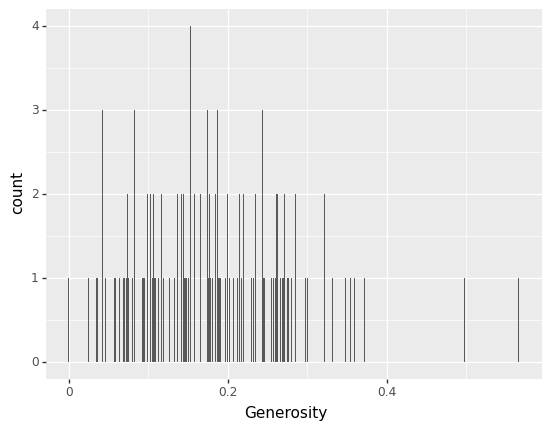

<ggplot: (372366713)>

In [10]:
ggplot(data = no_country) + geom_bar(mapping= aes(x='Generosity'))

In [11]:
print(skew(no_country['Generosity']), kurtosis(no_country['Generosity'], fisher=False)), no_country['Generosity'].mean(), no_country['Generosity'].mode(), no_country['Generosity'].median()

0.7387498688229475 4.0977065987326275


(None,
 0.18484615384615383,
 0    0.153
 Name: Generosity, dtype: float64,
 0.1775)

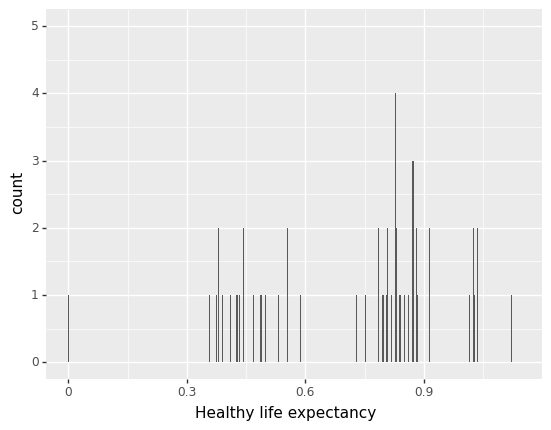

<ggplot: (372482332)>

In [12]:
ggplot(data = no_country) + geom_bar(mapping= aes(x='Healthy life expectancy'))

In [13]:
print(skew(no_country['Healthy life expectancy']), kurtosis(no_country['Healthy life expectancy'], fisher=False)), no_country['Healthy life expectancy'].mean(), no_country['Healthy life expectancy'].mode(), no_country['Healthy life expectancy'].median()

-0.6079224233901285 2.66851021564203


(None,
 0.7252435897435898,
 0    0.815
 1    0.999
 Name: Healthy life expectancy, dtype: float64,
 0.789)

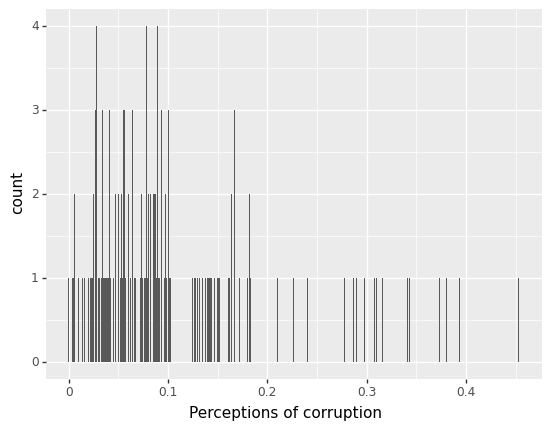

<ggplot: (372452142)>

In [14]:
ggplot(data = no_country) + geom_bar(mapping= aes(x='Perceptions of corruption'))

In [15]:
print(skew(no_country['Perceptions of corruption']), kurtosis(no_country['Perceptions of corruption'], fisher=False)), no_country['Perceptions of corruption'].mean(), no_country['Perceptions of corruption'].mode(), no_country['Perceptions of corruption'].median()

1.6344977355161203 5.3018368423861455


(None,
 0.11060256410256411,
 0    0.028
 1    0.078
 2    0.089
 Name: Perceptions of corruption, dtype: float64,
 0.08549999999999999)

Feature     |   Skewness    |   Kurtosis    |   App MoCT    |   MoCT    |   Outliers

GDP         |   Negative    |   Negative    |   Median      |   0.96    |   No

Generosity  |   Positive    |   Positive    |   Median      |   0.17    |   No

Healthy Li  |   Negative    |   Negative    |   Median      |   0.78    |   Yes

Corruption  |   Positive    |   Positive    |   Median      |   0.08    |   No


2. Produce a correlation chart for the dataset. When developing a model to predict the overall satisfaction score:

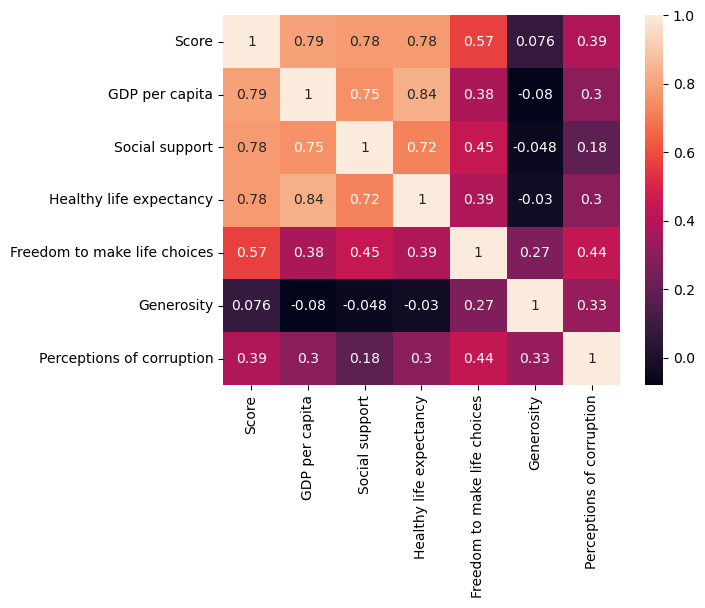

In [16]:
import seaborn as sns
import matplotlib as plt
heatmap = sns.heatmap(corr, annot=True)

2.1. Which features would act as the strongest predictor?

2.2. Which features may you wish to remove from the dataset, and why?

*NEW CODE / ANSWERS BELOW* 

2.1 I believe that the features that act as the strongest predictors are 
- GDP Per Capita 
- Social Supoort 
- Healthy Life Expectancey *

2.2 I think I would remove: 
- Generosity
- Healthy Life Expectancy

Both as a result of outliers which have negative/positive (respectively) impact. 

I'm not sure how I'd prove these opinion though. I am going to try and produce some new charts to see the impact. 

``` 
no_country = pd.DataFrame(happiness)
no_country.drop(columns='Country or region', inplace=True)

corr = no_country.corr(method= 'pearson')
corr 

heatmap = sns.heatmap(corr, annot=True)

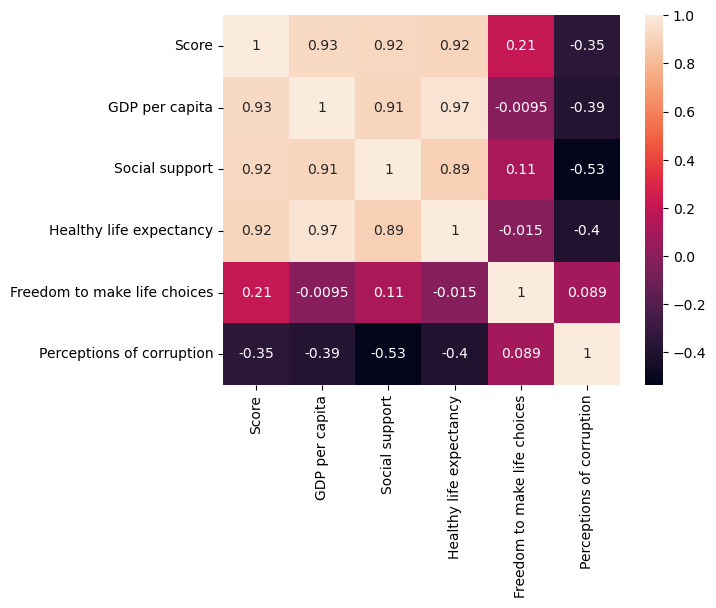

In [36]:
removeGen = pd.DataFrame(corr)
removeGen.drop(columns='Generosity', inplace=True)

corrRemGen = removeGen.corr(method= 'pearson')
corrRemGen
heatmapRemGen = sns.heatmap(corrRemGen, annot=True)

After seeing the results of removing Generosity, I am less convinced that this has as big an impact on the correlation results as I first thought. I will revert and try removing Freedom to make life choices instead. I now consider that Freedom to make life choices is close to 0 and therefore has little impact. 

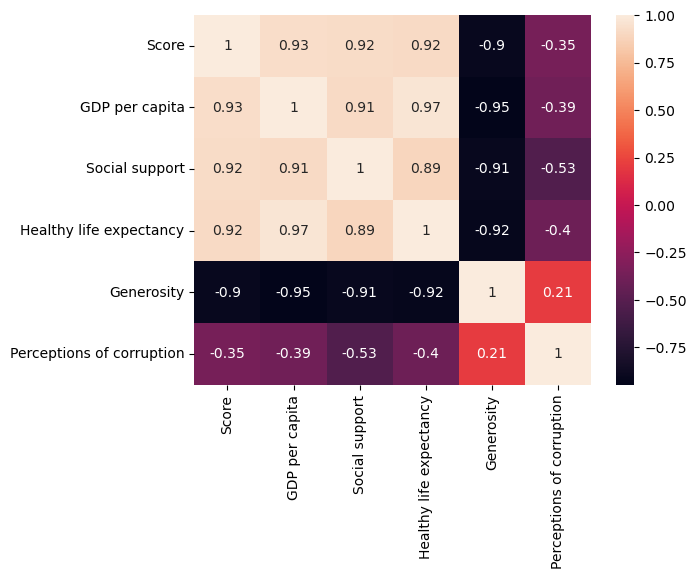

In [37]:
removeFreedom = pd.DataFrame(corr)
removeFreedom.drop(columns='Freedom to make life choices', inplace=True)

corrFreedom = removeFreedom.corr(method= 'pearson')
corrFreedom
heatmapRemFreedom = sns.heatmap(corrFreedom, annot=True)


I now see Generosity as having a strong negative correlation. 

I want to see how the correlation charts is affected by removing the 'Healthy Life Expectance' data, initially against the 'corr' dataframe. 

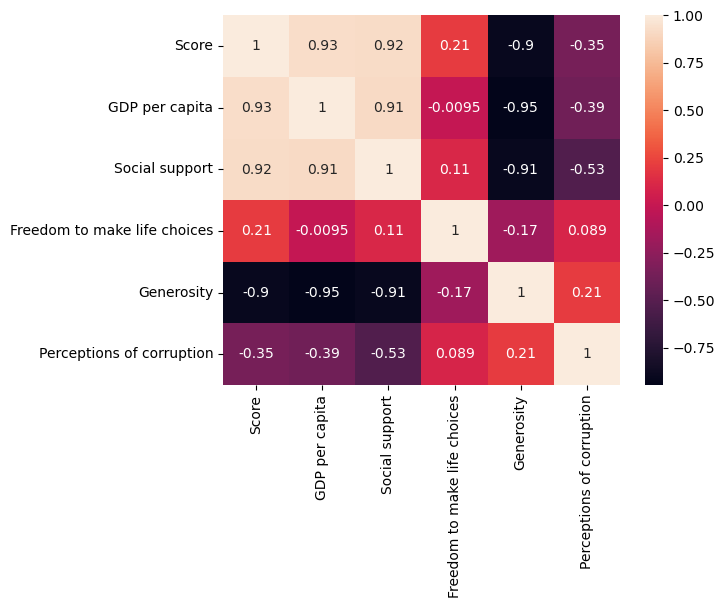

In [39]:
removeLifeEx = pd.DataFrame(corr)
removeLifeEx.drop(columns='Healthy life expectancy', inplace=True)

corrLifeEx = removeLifeEx.corr(method= 'pearson')
heatmapLifeEx = sns.heatmap(corrLifeEx, annot=True)

I believe the above correlation chart shows that removing the 'Healthy life expectancy' data has little impact on remaing correlations. 

Generosity is still showing as a negative correlation and 'Freedom to make life choice' is showing as close enough to 0 that it has little imapct. 

I will produce one more correlation chart showing the removal of both 'Freedom to make life choices' and 'Healthy life expectancy'. 


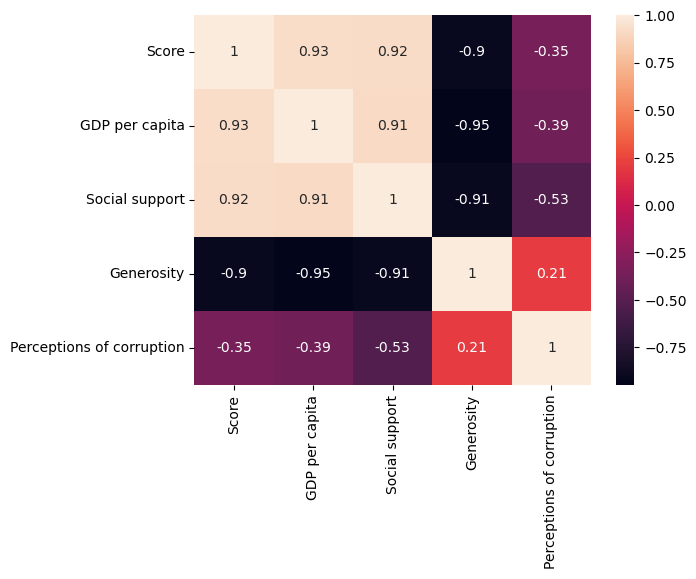

In [40]:
removeLifeEx2 = pd.DataFrame(removeFreedom)
removeLifeEx2.drop(columns='Healthy life expectancy', inplace=True)

corrLifeEx2 = removeLifeEx2.corr(method= 'pearson')
heatmapLifeEx2 = sns.heatmap(corrLifeEx2, annot=True)


Explain how the techniques covered in this week, and in previous weeks, can help to satisfy: 

3.1. The assumption of feature independence.
3.2. The assumption of observational independence.
3.3. The assumption of the approximation of normality.
3.4. The assumption of accurate data.

3.1. The assumption of feature independence.

By adding and removing features, we can see how they impact overall scores etc. The assumption of feature independence requires us to seek observations that are not related to one-another. 

3.2. The assumption of observational independence.

This is to ensure we do not seek multiple observations from a single data participant which would introduce bias the dataset. 

3.3. The assumption of the approximation of normality.


